In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np 
import os 
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI/10_Fruits'
valid_path = '/content/drive/MyDrive/Colab Notebooks/AI/10_Fruits'
test_path  = '/content/drive/MyDrive/Colab Notebooks/AI/10_Fruits'

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)



train_batches = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')


test_batches = test_datagen.flow_from_directory(
        # This is the target directory
        test_path,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 208 images belonging to 10 classes.
Found 208 images belonging to 10 classes.
Found 208 images belonging to 10 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
imgs, labels = next(train_batches)

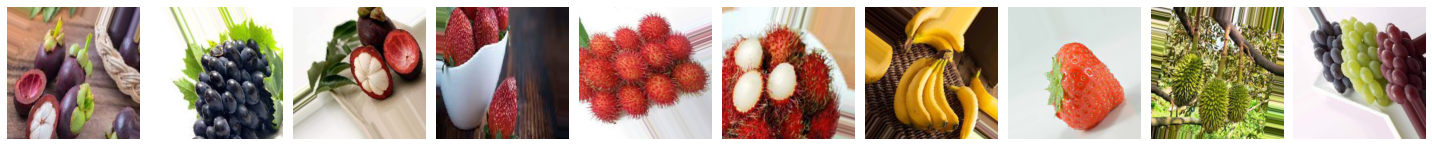

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=validation_batches,validation_steps=len(validation_batches), epochs=30, verbose=1)

Epoch 1/30
21/21 [==============================] - 133s 6s/step - loss: 2.3363 - accuracy: 0.1106 - val_loss: 2.2743 - val_accuracy: 0.1298
Epoch 2/30
21/21 [==============================] - 3s 166ms/step - loss: 2.2236 - accuracy: 0.1538 - val_loss: 1.9314 - val_accuracy: 0.2596
Epoch 3/30
21/21 [==============================] - 3s 164ms/step - loss: 1.8620 - accuracy: 0.2452 - val_loss: 1.8379 - val_accuracy: 0.3029
Epoch 4/30
21/21 [==============================] - 4s 168ms/step - loss: 1.7877 - accuracy: 0.3606 - val_loss: 1.5576 - val_accuracy: 0.3942
Epoch 5/30
21/21 [==============================] - 3s 164ms/step - loss: 1.5651 - accuracy: 0.4038 - val_loss: 1.3019 - val_accuracy: 0.5048
Epoch 6/30
21/21 [==============================] - 3s 166ms/step - loss: 1.4175 - accuracy: 0.4856 - val_loss: 1.1454 - val_accuracy: 0.5529
Epoch 7/30
21/21 [==============================] - 3s 164ms/step - loss: 1.3513 - accuracy: 0.4279 - val_loss: 1.1285 - val_accuracy: 0.5240
Epoch 8

In [ ]:
model.save('fruit.h5')

In [ ]:
import shutil
shutil.copy('/content/fruit.h5','/content/drive/MyDrive/Colab Notebooks/AI/10_Fruits')

'/content/drive/MyDrive/Colab Notebooks/AI/10_Fruits/fruit.h5'

In [ ]:
from keras.models import load_model
model5 = load_model('fruit.h5')

(1, 224, 224, 3)

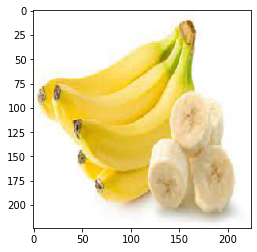

In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img=load_img('/content/chuốii.jpg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,224,224,3)
img=img.astype('float32')
img=img/255
img.shape

In [ ]:
a=np.argmax(model5.predict(img),axis=1)

if a == 0:
  print('ca rot')
elif a == 1:
  print('chom chom')
elif a == 2:
  print('chuoi')
elif a == 3:
  print('dau')
elif a == 4:
  print('dua hau')
elif a == 5:
  print('mang cut')
elif a == 6:
  print('nho')
elif a == 7:
  print('sau rieng')
elif a == 8:
  print('tao')
else :
  print('thom')  

chuoi
